<a href="https://colab.research.google.com/github/thalesdaviddom/IC-Lorena-Chico/blob/main/CreatingTFMN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a code aimed at a creation of TFMN according to the framework developed by the CogNosco Lab, here we apply this text-mining technique in the abstract of 5428 articles on political science of Latin America.

First we need to import our data, the current dataset has beem created from the queryng  of the scopus dataset according to the criteria defined by Codato:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Material_IC/Corpus/Artigos/dataset de trabalho/dataset.csv')
df.head()

Mounted at /content/drive


,Title,DOI,PDF Name,OpenAlex_id,Year,Source Title,Abstract,Author Keywords,Language of Original Document,Journal Country
0,Fighting for the True Path of Revolution: The ...,10.1177/0094582x241300288,Fighting-for-the-True-Path-of-Revolution-The-C...,https://openalex.org/W4405262715,2024,Latin American Perspectives,The Salvadoran Communist Party (PCS) underwent...,El Salvador; Latin American Communism; Revolut...,English,United States
1,Media representations of the Chilean press on ...,10.35956/v.24.n1.2024.p.66-85,Media-representations-of-the-Chilean-press-on-...,https://openalex.org/W4401198837,2024,Latin-American Journal of Discourse Studies,The study analyses media representations of th...,Chilean constitutional process; Critical Disco...,Spanish,Brazil
2,Autonomies and the Construction of Communal Ec...,10.1177/0094582x241297919,Autonomies-and-the-Construction-of-Communal-Ec...,https://openalex.org/W4404511688,2024,Latin American Perspectives,"San José, a Zapotec community in the Sierra Su...",Communal autonomies; Communal economies; Commu...,English,United States
3,Income Protection for Vulnerable Groups During...,10.1177/0094582x241308856,Income-Protection-for-Vulnerable-Groups-During...,https://openalex.org/W4406033597,2025,Latin American Perspectives,How can we understand the variation in countri...,Brazil; Chile; COVID-19; Emergency measures; I...,English,United States
4,Partisan Stereotyping and Polarization in Brazil,10.1017/lap.2023.38,Partisan-Stereotyping-and-Polarization-in-Braz...,https://openalex.org/W4389787718,2024,Latin American Politics and Society,"In recent decades, Brazilian voters have grown...",antipetismo; Brazil; negative partisanship; pa...,English,United States


Now we import the relevant libraries and set the enviroment for using the EmoAtlas:

In [4]:
!pip install git+https://github.com/MassimoStel/emoatlas

  Cloning https://github.com/MassimoStel/emoatlas to /tmp/pip-req-build-mqz1dx8y
  Running command git clone --filter=blob:none --quiet https://github.com/MassimoStel/emoatlas /tmp/pip-req-build-mqz1dx8y
  Resolved https://github.com/MassimoStel/emoatlas to commit 7856656405bc96324a2a377e1450cc3f4e689216
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00
  Created wheel for emoatlas: filename=emoatlas-0.2.0-py3-none-any.whl size=3766152 sha256=baa3896cbe371d67453e68e822afeed82f3df1ff114eaf23d0e71e27cd92e15f
  Stored in directory: /tmp/pip-ephem-wheel-cache-k8v455eg/wheels/f8/1e/54/1b9f3fd74b7906f753c3ee64aede89fd138b802bb33257d9bf
Successfully built emoatlas


In [5]:
!python -m spacy download en_core_web_lg
import nltk
nltk.download('wordnet')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Now we proceed for the creation and storing of TFMN for each one of the abstracts in the dataset:

In [6]:
from emoatlas import EmoScores

def replace_slash(s):
    return s.replace("/", "_")

emos = EmoScores()

In [ ]:
for i in range(df.size-1):
  #Creating TFMN
  sample_text = df.loc[i, "Abstract"]
  DOI = df.loc[i, "DOI"]
  DOI = replace_slash(DOI)
  fmnt = emos.formamentis_network(sample_text, semantic_enrichment = ['synonyms', 'hypernyms'], multiplex = True)

  #Storing the data
  edges_syno = fmnt.edges['synonyms']
  edges_synt = fmnt.edges['syntactic']
  edges_hyper = fmnt.edges['hypernyms']

  output_file = "/content/drive/MyDrive/Material_IC/Corpus/Artigos/TFMN/"+DOI+"_edges_list.txt"

  with open(output_file, "w", encoding="utf-8") as f:
    f.write("Synonyms:\n")
    for edge in edges_syno:
        f.write(f"{edge}\n")

    f.write("\nSyntactic:\n")
    for edge in edges_synt:
        f.write(f"{edge}\n")

    f.write("\nHypernyms:\n")
    for edge in edges_hyper:
        f.write(f"{edge}\n")

KeyError: 5429

Finally, we are presenting a piece of code for translating back our text econded edge information into workable graphs:

In [3]:
import networkx as nx
import ast

def file_to_graph(file_path):
    G = nx.Graph()

    with open(file_path, 'r', encoding='utf-8') as f:
        current_relation = None
        for line in f:
            line = line.strip()
            if not line:
                continue

            if ":" in line:  # Identify relation type headers
                current_relation = line.replace(":", "").strip()
                continue

            try:
                edge = ast.literal_eval(line)  # Convert tuple string to actual tuple
                if isinstance(edge, tuple) and len(edge) == 2:
                    G.add_edge(edge[0], edge[1], relation=current_relation)
            except (SyntaxError, ValueError):
                continue  # Ignore invalid lines

    return G




AttributeError: module 'networkx' has no attribute 'info'

Following is a simple usage example:

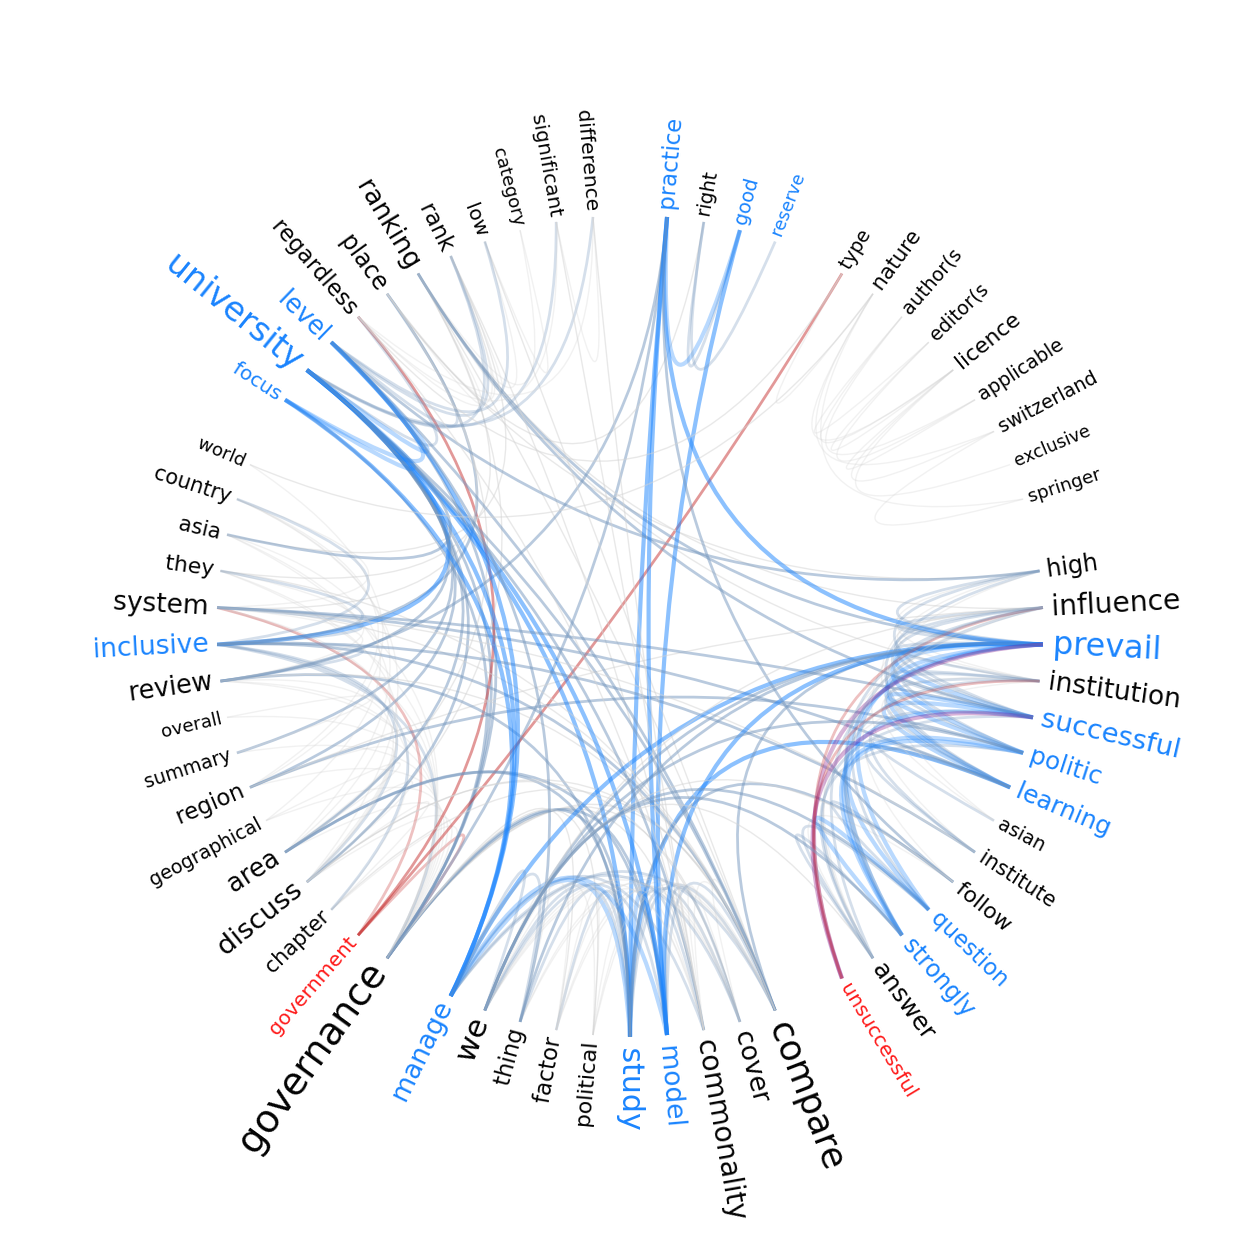

In [8]:
# Example usage
graph = file_to_graph("/content/drive/MyDrive/Material_IC/Corpus/Artigos/TFMN/10.1007_978-3-030-83465-4_7_edges_list.txt")

#geting back uor TFMN (warning i'm considering all edges as syntatic, but that's not always truth)
fmnt = emos.nxgraph_to_formamentis(graph)
emos.draw_formamentis(fmnt)

Alternativaly, here's a version of the code for mining only the syntatic edges:

In [ ]:
import networkx as nx
import ast

def extract_syntactic_edges(file_path):
    G = nx.Graph()
    is_syntactic = False  # Track if we're in the 'Syntactic' section

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue

            if ":" in line:  # Detect section headers
                is_syntactic = line.lower().startswith("syntactic")  # Activate only for "Syntactic"
                continue

            if is_syntactic:  # Process only syntactic edges
                try:
                    edge = ast.literal_eval(line)  # Convert string tuple to real tuple
                    if isinstance(edge, tuple) and len(edge) == 2:
                        G.add_edge(edge[0], edge[1])
                except (SyntaxError, ValueError):
                    continue  # Skip invalid lines

    return G

# Example usage
syntactic_graph = extract_syntactic_edges("10.1007_978-3-030-83465-4_7_edges_list.txt")
print(nx.info(syntactic_graph))
